<strong><h1><center><span style="color:green">Intro. to Data Science and Engineering Project</span></center></h1></strong>
<center>Eda Selin Küçükkara 150210325</center>
<center>Alperen Çağlar 150210340</center>

# <center><strong><span style="color:green">Project Team: </span></strong>BackingTeam</center>

# <center><strong><span style="color:green">Title: </span></strong>Tourism and Economy</center>

<h1><center><strong><span style="color:green">Summary: </center></h1>
<center></span></strong> In this project, we aim to examine the tourism in our country with the change of the economy in Türkiye. For this purpose, we will conduct a data analysis project using the data provided by Turkish Statistical Institute (TÜİK), World Bank Open Data and OEDC Data. </center>

<h1><center><strong><span style="color:green">Problem Definiton: </center></h1>
<center></span></strong> Due to economic crisis and COVID-19 quarantine the inflation in Türkiye has been rising. This changes peoples holidays and touristic activities. In this project, it will be examined how these problems affect the tourism in the country and citizens' touristic activities. </center>

<h1><center><strong><span style="color:green">Dataset(s) Sources: </span></strong></center></h1>

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv("worldbank_data.csv", encoding="utf-8")
display(df.head())

,Country Name,Country Code,Series Name,Series Code,1990 [YR1990],2000 [YR2000],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Turkiye,TUR,"Population, total",SP.POP.TOTL,54324142,64113547,76576117,78112073,79646178,81019394,82089826,82809304,83481684,84135428,84775404,85341241
1,Turkiye,TUR,Population growth (annual %),SP.POP.GROW,1.8934206959458,1.45790187647314,1.71047645801465,1.98593891469702,1.94494215050342,1.70945078412567,1.31255286212126,0.872633549513093,0.808683227368703,0.780048417598582,0.757771487830032,0.665236593056155
2,Turkiye,TUR,Surface area (sq. km),AG.SRF.TOTL.K2,785350,785350,785350,785350,785350,785350,785350,785350,785350,785350,785350,..
3,Turkiye,TUR,Population density (people per sq. km of land ...,EN.POP.DNST,70.5847511141718,83.3043761287892,99.4973129945558,101.493020022608,103.486321998883,105.270576770656,106.661416524824,107.596252744825,108.469893325364,109.31931967309,110.150856905266,..
4,Turkiye,TUR,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,..,..,15,14.7,14.3,13.5,13.9,14.4,15,14.4,..,..


Our first dataset provides a multi-dimensional view of Turkey’s socio-economic landscape from 1990 to 2022. It encompasses key indicators such as population metrics, GDP, poverty rates, education statistics, and health-related data, offering valuable insights into the country’s developmental trajectory over three decades. To obtain the precise data points that are most relevant to our study goals, we will carefully arrange and filter this large dataset

In [3]:
df.drop(["Country Code", "Series Code","1990 [YR1990]", "2000 [YR2000]", "2013 [YR2013]", "2014 [YR2014]"],inplace=True, axis=1)
df.head()

,Country Name,Series Name,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Turkiye,"Population, total",79646178,81019394,82089826,82809304,83481684,84135428,84775404,85341241
1,Turkiye,Population growth (annual %),1.94494215050342,1.70945078412567,1.31255286212126,0.872633549513093,0.808683227368703,0.780048417598582,0.757771487830032,0.665236593056155
2,Turkiye,Surface area (sq. km),785350,785350,785350,785350,785350,785350,785350,..
3,Turkiye,Population density (people per sq. km of land ...,103.486321998883,105.270576770656,106.661416524824,107.596252744825,108.469893325364,109.31931967309,110.150856905266,..
4,Turkiye,Poverty headcount ratio at national poverty li...,14.3,13.5,13.9,14.4,15,14.4,..,..


First, we removed the unnecessary columns in our dataset, we will examine the years between 2015-2022.

In [4]:
df.rename(columns={"Country Name":"Country_Name","Series Name":"Series_Name"},inplace=True)
df = df[(df.Series_Name == "Poverty headcount ratio at national poverty lines (% of population)")| (df.Series_Name == "Inflation, GDP deflator (annual %)") ]
df.reset_index(drop=True, inplace=False)

,Country_Name,Series_Name,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Turkiye,Poverty headcount ratio at national poverty li...,14.3,13.5,13.9,14.4,15,14.4,..,..
1,Turkiye,"Inflation, GDP deflator (annual %)",7.84491693010263,8.13047807814451,10.9824216683285,16.4758182074064,13.8192559838756,14.8528234526725,28.9505861055085,96.106781054


Then, we filtered the rows which we need to use in our problem.

In [5]:
df_2 = pd.read_excel("departing_tourism_data_tuik.xls")
display(df_2.head())

,"İkamet Ülkelerine Göre Çıkış Yapan Ziyaretçi Sayısı, 2012-2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,"Number of Person by Country of Residence, 2012...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,İkamet,Yıl - Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Country of Residence,2012,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020(1),2021.0,2.022000e+03
4,A.B.D. - USA,883408,856728.0,888077.0,833850.0,505989.0,331239.0,468281.0,626298.0,148914,365211.0,1.020705e+06


Our second dataset here represents the number of visitors departing from various countries to Turkey from 2012 to 2022. There are rows that needs to get deleted to use this dataset for our project.

In [6]:
df_2.columns = df_2.iloc[3]
df_2 = df_2.iloc[4:30]
display(df_2)

3,Country of Residence,2012,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020(1),2021.0,2022.0
4,A.B.D. - USA,883408,856728.0,888077.0,833850.0,505989.0,331239.0,468281.0,626298.0,148914,365211.0,1.020705e+06
5,Almanya - Germany,7305228,7378650.0,7794762.0,8402180.0,6960545.0,7117716.0,8022883.0,8861124.0,2903189,6314266.0,9.703526e+06
6,Avusturya - Austria,832019,916069.0,802133.0,836755.0,677284.0,578074.0,620002.0,652020.0,238682,516081.0,7.669744e+05
7,Azerbaycan - Azerbaijan,663758,715578.0,726078.0,650569.0,656685.0,792883.0,916429.0,933291.0,250087,512215.0,7.443593e+05
8,Belçika - Belgium,838895,859199.0,809843.0,814868.0,627223.0,651702.0,751660.0,755681.0,219196,459091.0,8.418419e+05
9,Birleşik Krallık - United Kingdom,2643699,2738368.0,2818021.0,2776057.0,1957576.0,1951637.0,2575768.0,2978764.0,1122967,473681.0,3.760061e+06
10,Bulgaristan - Bulgaria,1514894,1640259.0,1701021.0,1826947.0,1710276.0,1854683.0,2387679.0,2719962.0,1190803,1339552.0,2.846790e+06
11,Çin - People's Republic of China,71573,95995.0,198234.0,295307.0,153436.0,276559.0,453354.0,475558.0,32413,30314.0,6.883468e+04
12,Danimarka - Denmark,459601,453235.0,494171.0,467665.0,389346.0,335900.0,423898.0,450447.0,72493,172265.0,4.928163e+05
13,Fransa - France,1585462,1659560.0,1473082.0,1413257.0,1149961.0,1218240.0,1178561.0,1423721.0,611872,1138227.0,1.643861e+06


First, we removed the unnecessary lines and columns.

In [7]:
df_2.drop([2012, 2013.0, 2014.0],inplace=True, axis=1)
df_2 = df_2.rename_axis(None, axis=1)
df_2.reset_index(drop=True, inplace=True)

In [8]:
df_2["Country_Total"]= df_2.sum(axis=1, numeric_only=True)
total = {"Country of Residence" : "Total"}
total2 = ["Total"]
for i in df_2.columns[1:]:
    val = sum(df_2[i])
    total[str(i)] = val
    total2.append(val)
df_2.loc[len(df_2.index)] = total2

display(df_2)

,Country of Residence,2015.0,2016.0,2017.0,2018.0,2019.0,2020(1),2021.0,2022.0,Country_Total
0,A.B.D. - USA,833850.0,505989.0,331239.0,468281.0,626298.0,148914,365211.0,1.020705e+06,4.151573e+06
1,Almanya - Germany,8402180.0,6960545.0,7117716.0,8022883.0,8861124.0,2903189,6314266.0,9.703526e+06,5.538224e+07
2,Avusturya - Austria,836755.0,677284.0,578074.0,620002.0,652020.0,238682,516081.0,7.669744e+05,4.647190e+06
3,Azerbaycan - Azerbaijan,650569.0,656685.0,792883.0,916429.0,933291.0,250087,512215.0,7.443593e+05,5.206431e+06
4,Belçika - Belgium,814868.0,627223.0,651702.0,751660.0,755681.0,219196,459091.0,8.418419e+05,4.902067e+06
5,Birleşik Krallık - United Kingdom,2776057.0,1957576.0,1951637.0,2575768.0,2978764.0,1122967,473681.0,3.760061e+06,1.647354e+07
6,Bulgaristan - Bulgaria,1826947.0,1710276.0,1854683.0,2387679.0,2719962.0,1190803,1339552.0,2.846790e+06,1.468589e+07
7,Çin - People's Republic of China,295307.0,153436.0,276559.0,453354.0,475558.0,32413,30314.0,6.883468e+04,1.753363e+06
8,Danimarka - Denmark,467665.0,389346.0,335900.0,423898.0,450447.0,72493,172265.0,4.928163e+05,2.732337e+06
9,Fransa - France,1413257.0,1149961.0,1218240.0,1178561.0,1423721.0,611872,1138227.0,1.643861e+06,9.165828e+06


Then we organized the dataset and added a new row and a column.

In [9]:
df_3 = pd.read_excel("general_tourism_data_tuik.xls")
display(df_3.head())

,"Turizm Geliri, Gideri ve Ortalama Geceleme Sayısı, 2001 - 2023",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,"Tourism Income, Expenditure and Average Number...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Toplam - Total,NaN,NaN,NaN,NaN,Vatandaşlar (Türkiye'de ikamet eden) - Citizen...,NaN,NaN,NaN
3,Yıl\nYear,Yıllık-Annual\nÇeyrek-Quarter,Turizm geliri\nTourism income\n( 000 $),Ziyaretçi sayısı\nNumber of departing \nvisitors,Kişi başı ortalama \nharcama\nAverage expendit...,Ortalama geceleme sayısı \nAverage number of o...,NaN,Turizm gideri\nTourism expenditure\n( 000 $),\nTürkiye'de ikamet eden yurt dışını ziyaret ...,Kişi başı ortalama \nharcama\nAverage expendit...,Ortalama geceleme sayısı \nAverage number of o...
4,2001,Yıllık-Annual,10450728.249549,13450127.477,776.998454,-,NaN,-,-,-,-


Our third dataset provides a comprehensive overview of Turkey’s tourism sector from 2001 to 2023. It is divided into annual and quarterly data, and it includes several key metrics like Total Tourism Income, Number of Departing Visitors, Average Expenditure Per Capita, Average Number of Overnights, Tourism Expenditure, Number of Citizens (Resident in Turkey) Visited Abroad, Average Expenditure Per Capita for Citizens Abroad, and Average Number of Overnights for Citizens Abroad. After deleting unnecesarry rows and columns we will use dataset for our porject more easily.

In [10]:
df_3.columns = df_3.iloc[3]
df_3 = df_3.iloc[18:38]
df_3.dropna(axis=1, how="all", inplace=True)
display(df_3)

3,Yıl\nYear,Yıllık-Annual\nÇeyrek-Quarter,Turizm geliri\nTourism income\n( 000 $),Ziyaretçi sayısı\nNumber of departing \nvisitors,Kişi başı ortalama \nharcama\nAverage expenditure per capita\n($),Ortalama geceleme sayısı \nAverage number of overnights,Turizm gideri\nTourism expenditure\n( 000 $),\nTürkiye'de ikamet eden yurt dışını ziyaret eden vatandaş sayısı\nNumber of citizens (resident in Türkiye) visited abroad,Kişi başı ortalama \nharcama\nAverage expenditure per capita\n($),Ortalama geceleme sayısı \nAverage number of overnights
18,2015,Yıllık-Annual,32492211.977645,41617530.3315,780.733785,10.065018,5698422.950708,8750851.016584,651.185004,11.942026
19,2016,Yıllık-Annual,22839468.214895,31365329.696,728.175614,11.3534,5049793.348219,7891909.183264,639.869673,10.997575
20,2017,Yıllık-Annual,27044542.254325,38620345.917,700.266675,10.86454,5137243.748517,8886916.058549,578.06811,9.872048
21,2018,Yıllık-Annual,30545923.60386,45628672.6335,669.445808,9.949153,4896310.149585,8383432.3015,584.046006,9.369216
22,2019,Yıllık-Annual,38930473.601,51860042.007,750.683418,9.85183,4403669.63497,9650512.308328,456.314597,9.067445
23,2020,Yıllık(1) - Annual,14817273.344,15826266.370949,936.245669,12.388428,1104544.800313,2242864.423086,492.470605,12.61939
24,NaN,I,4664391.952,5639413.4285,827.10587,10.335699,793491.409978,1743660.007693,455.072323,9.389281
25,NaN,II,647474.488,-,-,-,-,-,-,-
26,NaN,III,5122304.545,5604155,914.019071,11.783555,126079.370822,203223,620.399122,18.357864
27,NaN,IV,4383102.359,4582697.942449,956.445835,15.613812,184974.019513,295981.415393,624.951466,27.708253


First, we cleaned dataset to have the right parts for our projects.

In [11]:
df_3 = df_3.rename_axis(None, axis=1)
df_3.reset_index(drop=True, inplace=True)
display(df_3)

,Yıl\nYear,Yıllık-Annual\nÇeyrek-Quarter,Turizm geliri\nTourism income\n( 000 $),Ziyaretçi sayısı\nNumber of departing \nvisitors,Kişi başı ortalama \nharcama\nAverage expenditure per capita\n($),Ortalama geceleme sayısı \nAverage number of overnights,Turizm gideri\nTourism expenditure\n( 000 $),\nTürkiye'de ikamet eden yurt dışını ziyaret eden vatandaş sayısı\nNumber of citizens (resident in Türkiye) visited abroad,Kişi başı ortalama \nharcama\nAverage expenditure per capita\n($),Ortalama geceleme sayısı \nAverage number of overnights
0,2015,Yıllık-Annual,32492211.977645,41617530.3315,780.733785,10.065018,5698422.950708,8750851.016584,651.185004,11.942026
1,2016,Yıllık-Annual,22839468.214895,31365329.696,728.175614,11.3534,5049793.348219,7891909.183264,639.869673,10.997575
2,2017,Yıllık-Annual,27044542.254325,38620345.917,700.266675,10.86454,5137243.748517,8886916.058549,578.06811,9.872048
3,2018,Yıllık-Annual,30545923.60386,45628672.6335,669.445808,9.949153,4896310.149585,8383432.3015,584.046006,9.369216
4,2019,Yıllık-Annual,38930473.601,51860042.007,750.683418,9.85183,4403669.63497,9650512.308328,456.314597,9.067445
5,2020,Yıllık(1) - Annual,14817273.344,15826266.370949,936.245669,12.388428,1104544.800313,2242864.423086,492.470605,12.61939
6,NaN,I,4664391.952,5639413.4285,827.10587,10.335699,793491.409978,1743660.007693,455.072323,9.389281
7,NaN,II,647474.488,-,-,-,-,-,-,-
8,NaN,III,5122304.545,5604155,914.019071,11.783555,126079.370822,203223,620.399122,18.357864
9,NaN,IV,4383102.359,4582697.942449,956.445835,15.613812,184974.019513,295981.415393,624.951466,27.708253


Then we organized the indexes.

In [12]:
df_4 = pd.read_csv("oecd_data.csv")
display(df_4.head())

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,EXCH,TOT,NATUSD,A,1950,0.892857,NaN
1,AUS,EXCH,TOT,NATUSD,A,1951,0.892857,NaN
2,AUS,EXCH,TOT,NATUSD,A,1952,0.892857,NaN
3,AUS,EXCH,TOT,NATUSD,A,1953,0.892857,NaN
4,AUS,EXCH,TOT,NATUSD,A,1954,0.892857,NaN


Our fourth dataset provides the exchange rates are defined as the price of one country's' currency in relation to another country's currency. This indicator is measured in terms of national currency per US dollar.

In [13]:
df_4 = df_4.loc[(df_4["TIME"] >= 2015) & (df_4["TIME"] <= 2022)]
df_4.drop(["INDICATOR", "SUBJECT", "MEASURE", "FREQUENCY", "Flag Codes"], axis=1, inplace=True)
df_4.reset_index(drop=True, inplace=True)
display(df_4.head())
display(df_4.tail())

,LOCATION,TIME,Value
0,AUS,2015,1.331090
1,AUS,2016,1.345214
2,AUS,2017,1.304758
3,AUS,2018,1.338412
4,AUS,2019,1.438507


,LOCATION,TIME,Value
507,SEN,2018,555.446458
508,SEN,2019,585.911013
509,SEN,2020,575.586005
510,SEN,2021,554.530675
511,SEN,2022,623.759701


We removed the unnecessary columns and rows. In the end, datasets are ready to use in our project.

<h1><center><strong><span style="color:green">Research Questions: </span></strong></center></h1>
<center>Is there a discernible relationship between inflation levels and the total revenue generated from tourism in Türkiye? How have economic downturns affected the financial performance of the tourism sector?</center><br/>
<center>How have changes in inflation rates influenced the patterns of tourists' personal expenditures in Türkiye? Are there shifts in spending behavior during economic challenges?</center><br/>
<center>How did the economic change of Türkiye changed the spending behaviours of citizens in Türkiye?</center><br/>
<center>How has the COVID-19 pandemic influenced the tourism sector in Türkiye, particularly in terms of visitor numbers and tourism income?</center>

<h1><center><strong><span style="color:green">EDA</span></strong></center></h1>
<center>Data example, some visualizations from your data.</center>

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

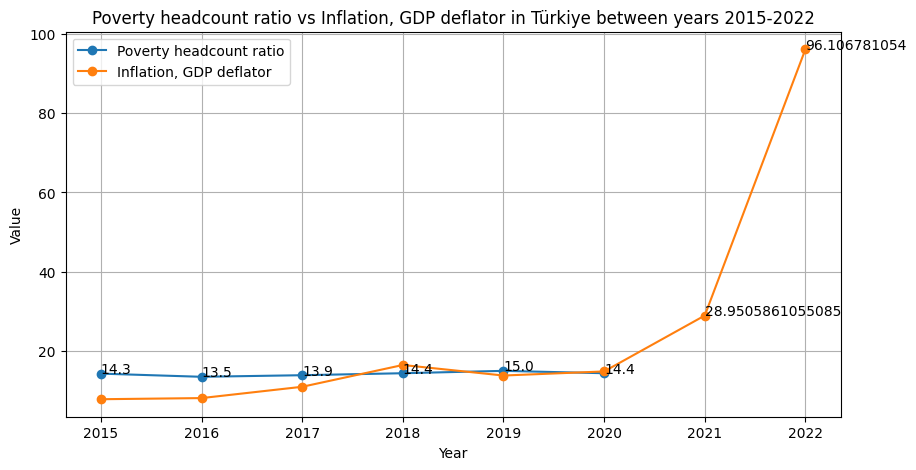

In [15]:
if "Poverty headcount ratio at national poverty lines (% of population)" in df["Series_Name"].values and "Inflation, GDP deflator (annual %)" in df["Series_Name"].values:
    
    poverty_headcount_ratio = df[df["Series_Name"] == "Poverty headcount ratio at national poverty lines (% of population)"].iloc[0, 2:].values
    inflation_gdp_deflator = df[df["Series_Name"] == "Inflation, GDP deflator (annual %)"].iloc[0, 2:].values

    poverty_headcount_ratio = pd.to_numeric(poverty_headcount_ratio, errors="coerce")
    inflation_gdp_deflator = pd.to_numeric(inflation_gdp_deflator, errors="coerce")

    years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

    plt.figure(figsize=(10,5))

    # Plotting Poverty headcount ratio
    plt.plot(years, poverty_headcount_ratio, marker='o', label="Poverty headcount ratio")
    # Plotting Inflation, GDP deflator
    plt.plot(years, inflation_gdp_deflator, marker='o', label="Inflation, GDP deflator")

    # Adding annotations for each point
    for i, txt in enumerate(poverty_headcount_ratio):
        plt.annotate(txt, (years[i], poverty_headcount_ratio[i]))
    # We added last two of this line because of the visuality esthetic    
    for i, txt in enumerate(inflation_gdp_deflator):
        if i>5:
            plt.annotate(txt, (years[i], inflation_gdp_deflator[i]))
        
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.title("Poverty headcount ratio vs Inflation, GDP deflator in Türkiye between years 2015-2022")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("The required series do not exist in the dataset.")

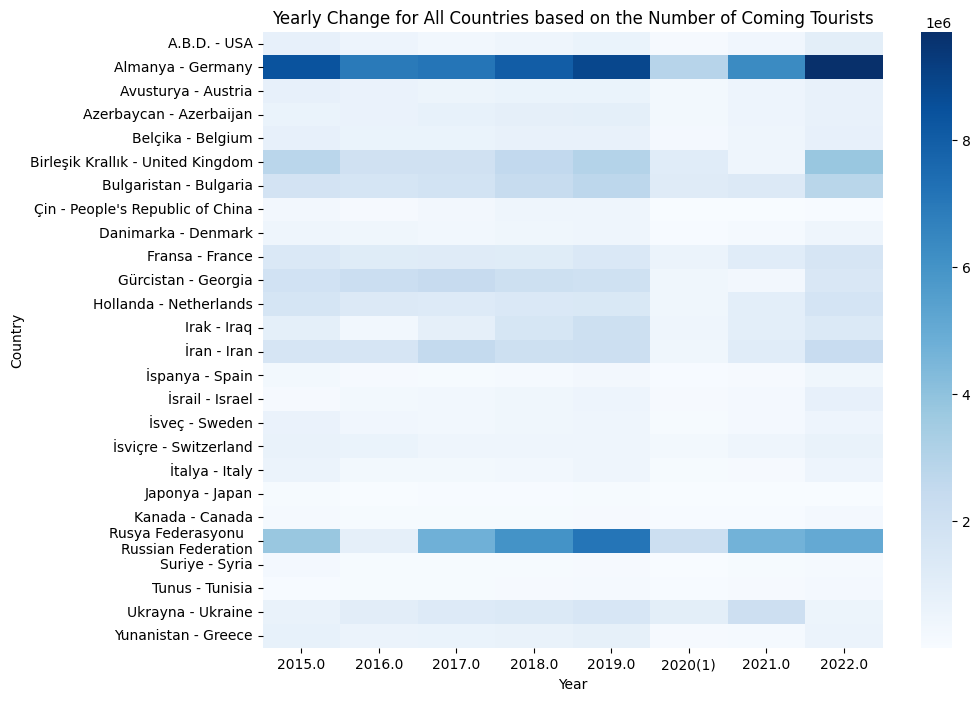

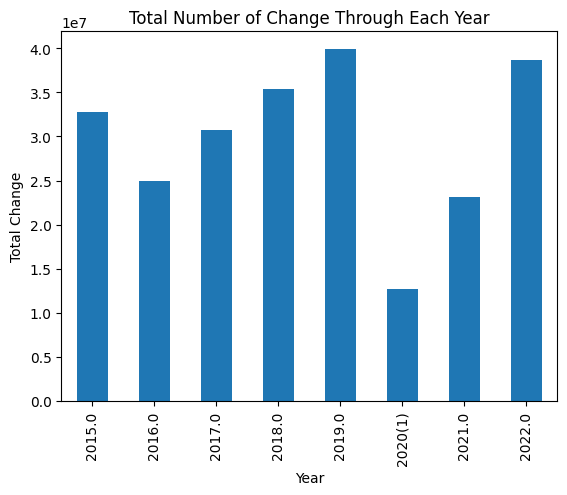

In [16]:
df_2.set_index("Country of Residence", inplace=True)

df_without_total = df_2.drop("Total")

df_without_total = df_without_total.apply(pd.to_numeric, errors="coerce")

# Plotting the yearly change for all countries in one plot
plt.figure(figsize=(10, 8))
sns.heatmap(df_without_total.iloc[:, :-1], cmap="Blues")
plt.title("Yearly Change for All Countries based on the Number of Coming Tourists")
plt.xlabel("Year")
plt.ylabel("Country")
plt.show()


# Plotting the total number of change through each year using the "Total" row
df_2.loc["Total"].iloc[:-1].plot(kind="bar", title="Total Number of Change Through Each Year")
plt.xlabel("Year")
plt.ylabel("Total Change")
plt.show()

In [17]:
#%pip install geopandas geoplot
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

C:\Users\Eda\AppData\Local\Temp\ipykernel_14032\704031568.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


C:\Users\Eda\AppData\Local\Temp\ipykernel_14032\1713825630.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


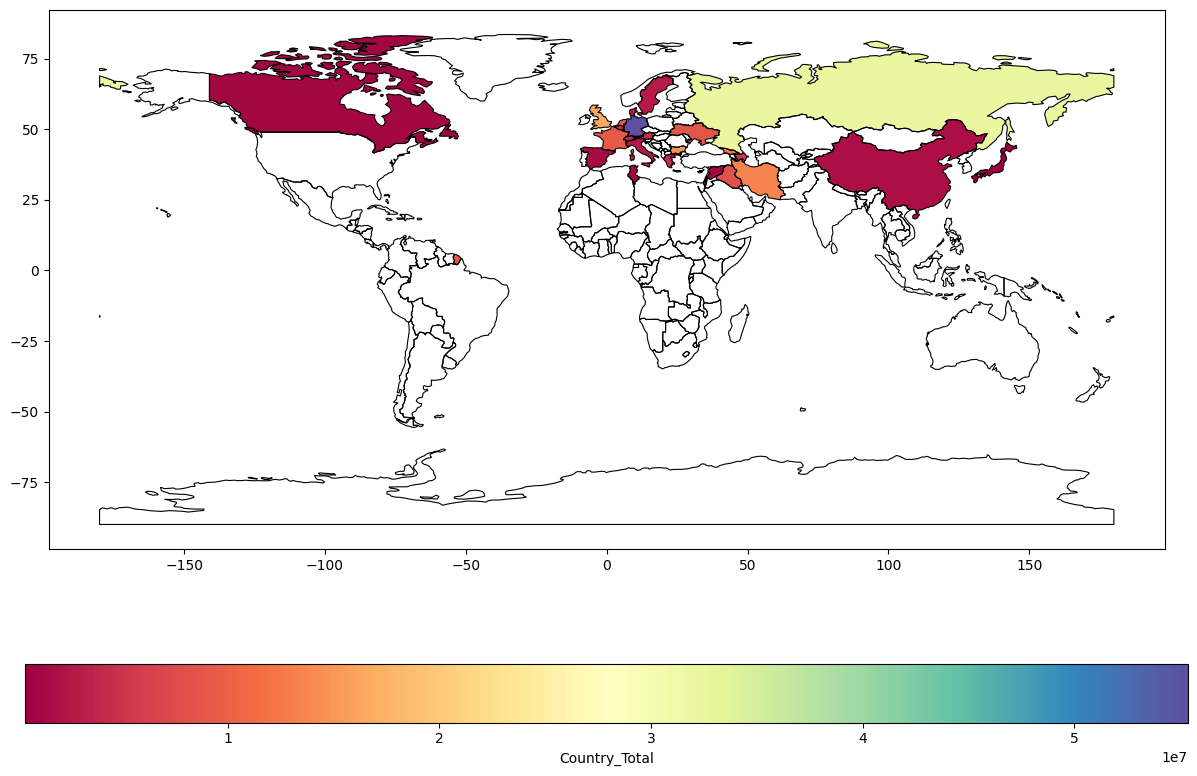

In [18]:
df_2 = df_2[:-1]

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Extracting English names
df_2.index = df_2.index.str.split(" - ").str[-1]

# Manually mapping country names
country_mapping = {
    "People's Republic of China": "China",
    "Rusya Federasyonu  \nRussian Federation": "Russia",
    "USA": "United States"
}

df_2.index = df_2.index.to_series().map(country_mapping).fillna(df_2.index.to_series()).tolist()

merged = world.join(df_2, on="name")

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column="Country_Total", ax=ax, cmap="Spectral", legend=True, legend_kwds={"label": "Country_Total", "orientation": "horizontal"})

# Plotting the country boundaries
world.boundary.plot(ax=ax, color="black", linewidth=0.8)

plt.show()


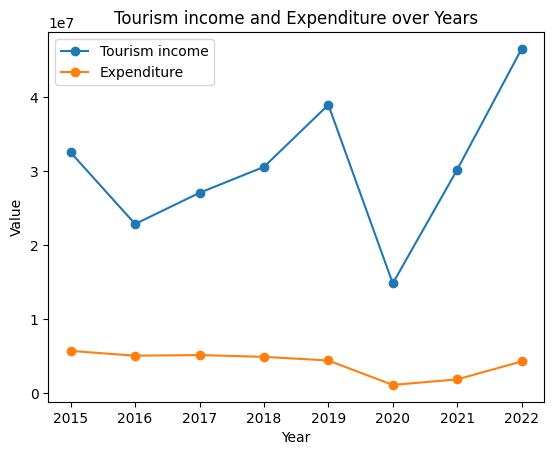

In [19]:
fig, ax = plt.subplots()
df_yearly = df_3.dropna(subset=["Yıl\nYear"])
# Creating a line plot for "Tourism income"
ax.plot(df_yearly["Yıl\nYear"], df_yearly["Turizm  geliri\nTourism income\n( 000 $)"], marker="o", linestyle="-", label="Tourism income")
# Creating a line plot for "Expenditure"
ax.plot(df_yearly["Yıl\nYear"], df_yearly["Turizm  gideri\nTourism expenditure\n( 000 $)"], marker="o", linestyle="-", label="Expenditure")

ax.set_xlabel("Year")
ax.set_ylabel("Value")
ax.set_title("Tourism income and Expenditure over Years")
ax.legend()
plt.show()

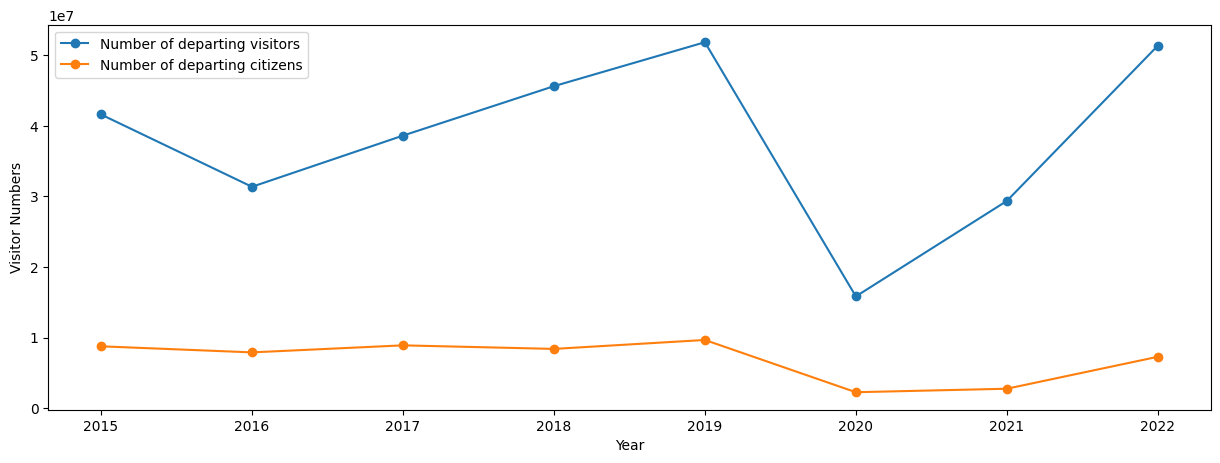

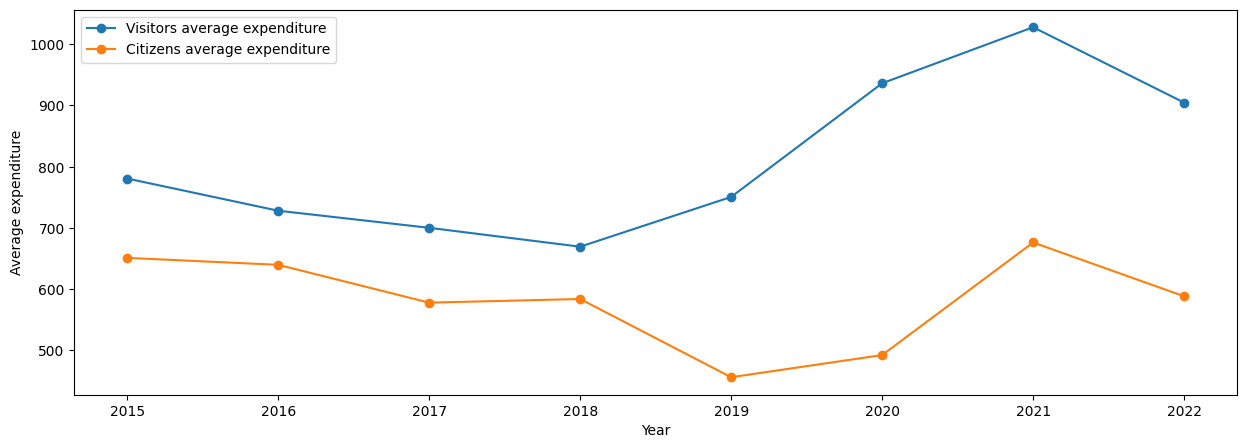

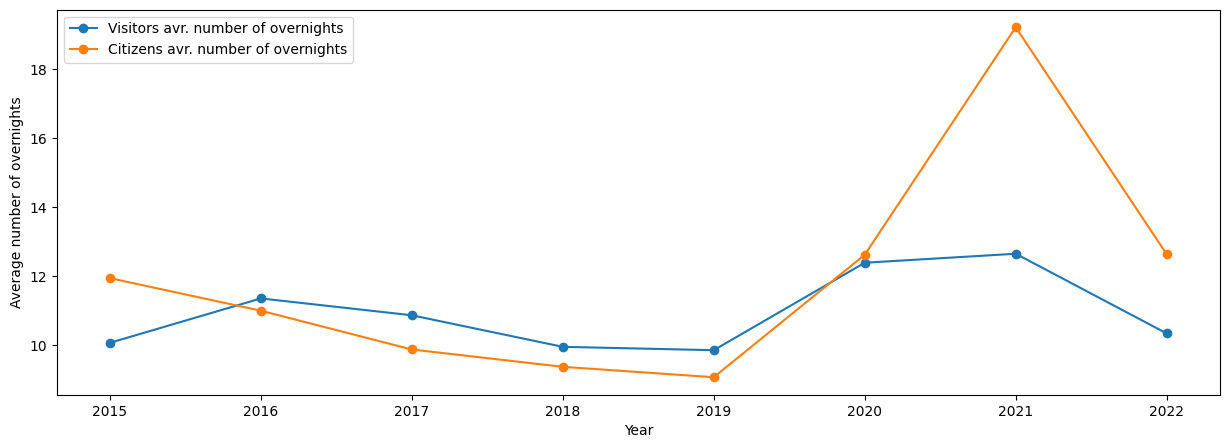

In [20]:
cols = df_yearly.columns.tolist()

index = [i for i, x in enumerate(cols) if x == "Kişi başı ortalama \nharcama\nAverage expenditure per capita\n($)"][1]
index2 = [i for i, x in enumerate(cols) if x == "Ortalama geceleme sayısı \nAverage number of overnights"][1]

# Changing the name of the second occurrence
cols[index] = "Turkish citizens average expenditure"
cols[index2] = "Turkish citizens average number of overnights"

df_yearly.columns = cols
fig, ax = plt.subplots(figsize=(15, 5)) 
# Create a line plot for "visitors"
ax.plot(df_yearly["Yıl\nYear"], df_yearly["Ziyaretçi sayısı\nNumber of departing \nvisitors"], marker="o", linestyle="-", label="Number of departing visitors")
ax.plot(df_yearly["Yıl\nYear"], df_yearly[" \nTürkiye'de ikamet eden yurt dışını ziyaret eden vatandaş sayısı\nNumber of citizens (resident in Türkiye) visited abroad"], marker="o", linestyle="-", label="Number of departing citizens")
ax.set_ylabel("Visitor Numbers")
ax.set_xlabel("Year")
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(df_yearly["Yıl\nYear"], df_yearly["Kişi başı ortalama \nharcama\nAverage expenditure per capita\n($)"], marker="o", linestyle="-", label="Visitors average expenditure")
ax.plot(df_yearly["Yıl\nYear"], df_yearly["Turkish citizens average expenditure"], marker="o", linestyle="-", label="Citizens average expenditure")
ax.set_ylabel("Average expenditure")
ax.set_xlabel("Year")
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(15, 5))
# Create a line plot for "nights"
ax.plot(df_yearly["Yıl\nYear"], df_yearly["Ortalama geceleme sayısı \nAverage number of overnights"], marker="o", linestyle="-", label="Visitors avr. number of overnights")
ax.plot(df_yearly["Yıl\nYear"], df_yearly["Turkish citizens average number of overnights"], marker="o", linestyle="-", label="Citizens avr. number of overnights")
ax.set_xlabel("Year")
ax.set_ylabel("Average number of overnights")
ax.legend()
plt.show()


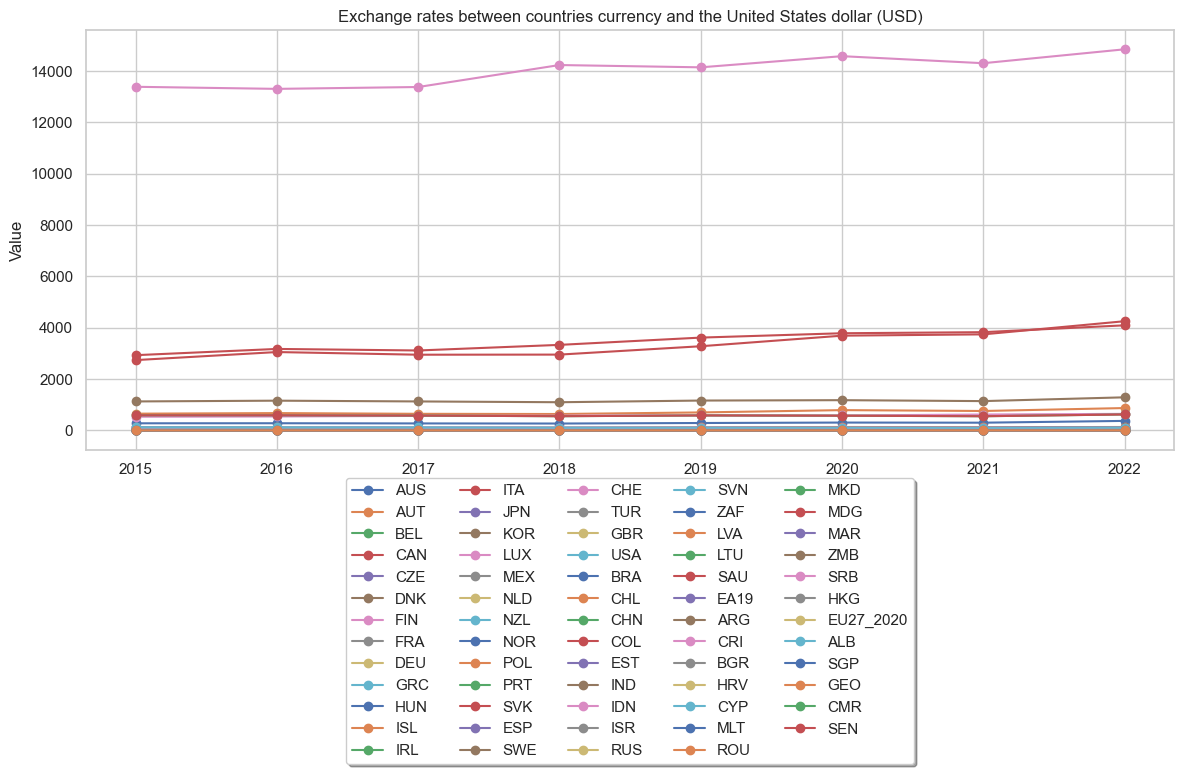

In [21]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(12, 8))

for location in df_4["LOCATION"].unique():
    data = df_4[df_4["LOCATION"] == location]
    ax.plot(data["TIME"], data["Value"], marker="o", label=location)

ax.set_title("Exchange rates between countries currency and the United States dollar (USD)")
ax.set_xlabel("Year")
ax.set_ylabel("Value")

ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)

plt.tight_layout()
plt.show()


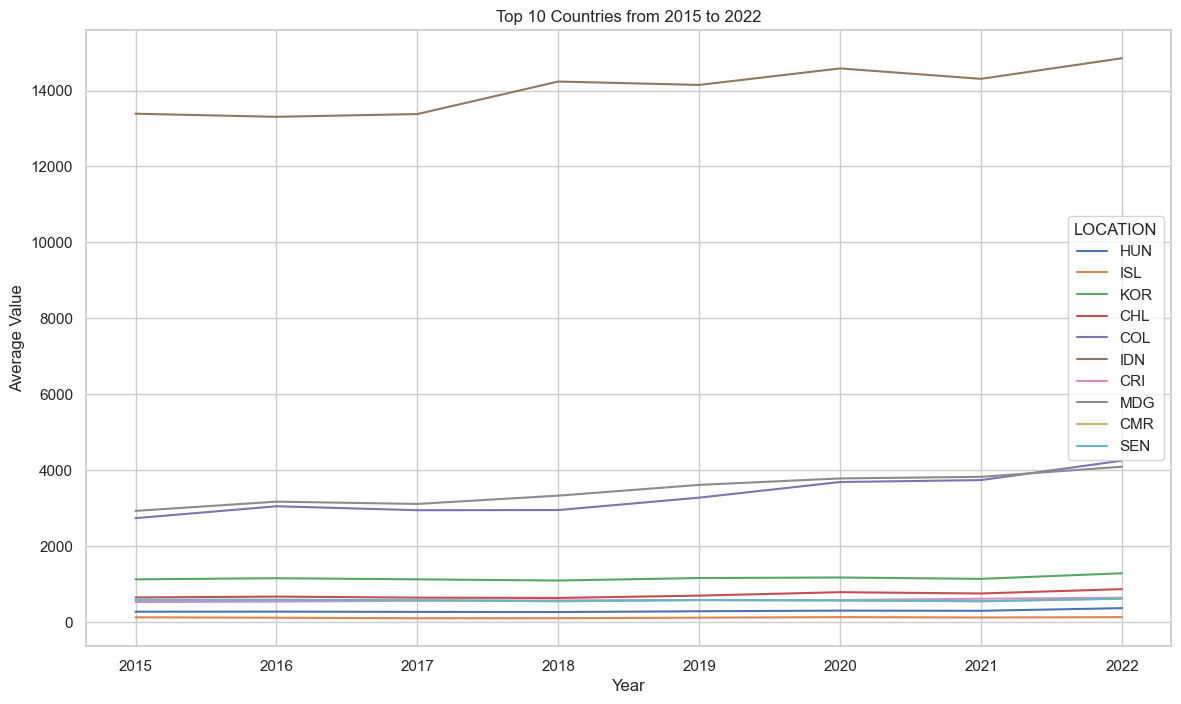

,LOCATION,TIME,Value
80,HUN,2015,279.332500
81,HUN,2016,281.523333
82,HUN,2017,274.433333
83,HUN,2018,270.211667
84,HUN,2019,290.660000
...,...,...,...
507,SEN,2018,555.446458
508,SEN,2019,585.911013
509,SEN,2020,575.586005
510,SEN,2021,554.530675


In [22]:
top_countries = df_4.groupby("LOCATION")["Value"].mean().sort_values(ascending=False).head(10)

df_top_countries = df_4[df_4["LOCATION"].isin(top_countries.index)]

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_top_countries, x="TIME", y="Value", hue="LOCATION")

plt.title("Top 10 Countries from 2015 to 2022")
plt.xlabel("Year")
plt.ylabel("Average Value")

plt.show()
display(df_top_countries)

<h1><center><strong><span style="color:green">Research Questions and Proposed tests</span></strong></center></h1>

<center><span style="color:purple">How did the economic change of Türkiye changed the spending behaviours of citizens in Türkiye?</span></center>

The average amount spent and the average number of nights spent by Turkish nationals are significantly impacted by the economic conditions in Turkey, as seen by the inflation rate. We will compare the inflation changes and average expendetures of Turkish citizens as a tourist through 2015-2022 with polynomial regression.

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Mean squared error for Turkish citizens average expenditure: 7483.39


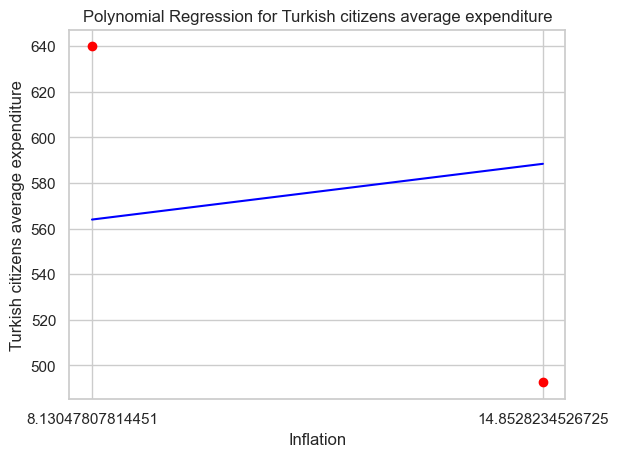

Mean squared error for Turkish citizens average number of overnights: 2.96


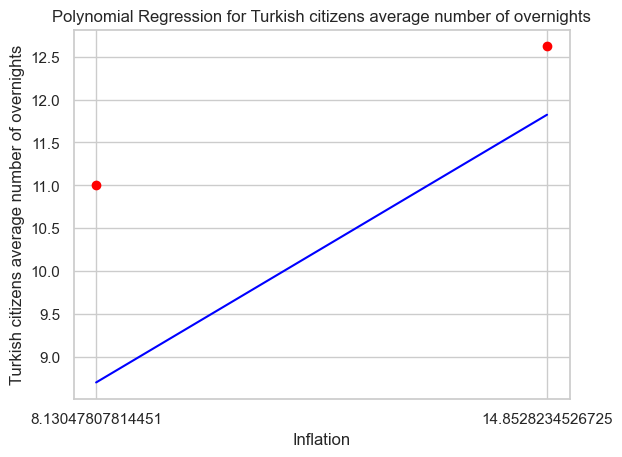

In [24]:
df_transpose = df.transpose()
df_transpose.drop([4], inplace=True, axis=1)
df_transpose.drop(["Country_Name", "Series_Name"], inplace=True, axis=0)
df_transpose.rename(columns={33: "Inflation_Change"}, inplace=True)
df_transpose.reset_index(drop=True, level=None, inplace=True)

X = df_transpose[["Inflation_Change"]] # independent variable

for target in ["Turkish citizens average expenditure", "Turkish citizens average number of overnights"]:
    y = df_yearly[target] # dependent variable

    # Splitting data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    poly = PolynomialFeatures(degree=2)

    # Transforming the input data
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    regressor = LinearRegression()

    # Fitting the model
    regressor.fit(X_train_poly, y_train)

    # Makeing predictions using the testing set
    y_pred = regressor.predict(X_test_poly)

    # Calculating the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean squared error for {target}: {mse:.2f}")

    plt.scatter(X_test.values.flatten(), y_test.values, color="red")
    plt.plot(X_test.values.flatten(), regressor.predict(poly.transform(X_test)), color="blue")
    plt.title(f"Polynomial Regression for {target}")
    plt.xlabel("Inflation")
    plt.ylabel(target)
    plt.show()


We saw that our hypothesis is not right based on these results. Especially, for the average expenditure data our error is really high which could caused by less data, not well implementation or wrong hypothesis. On the other side average overnights error could be acceptable.

<center><span style="color:purple">Is there a discernible relationship between inflation levels and the total revenue generated from tourism in Türkiye? How have economic downturns affected the financial performance of the tourism sector?</span></center>

The correlation between Turkey's total tourist income and inflation rates, as well as the effect of economic downturns on the industry's financial performance, can be modeled using a polynomial regression.

<center><span style="color:purple">How have changes in inflation rates influenced the patterns of tourists' personal expenditures in Türkiye? Are there shifts in spending behavior during economic challenges?</span></center>

Variations in inflation rates have a substantial impact on the personal expenditures of visitors in Turkey, and noticeable changes in spending patterns occur during periods of economic challenges. Given this hypothesis, multiple linear regression is the appropriate strategy for solving the problem where we are attempting to determine the influence of inflation rate on tourist expenditure.

<center><span style="color:purple">How has the COVID-19 pandemic influenced the tourism sector in Türkiye, particularly in terms of visitor numbers and tourism income?</span></center>

The COVID-19 pandemic initially caused a significant decrease in visitor numbers and tourism income in Türkiye. To test this hypothesis, we can use a machine learning method called Singular Value Decomposition (SVD)

<h1><center><strong><span style="color:green">Potential products or how to convert this project to a service or product
</span></strong></center></h1>

This tool could use to analyze data to predict future trends in tourism and economy of the Türkiye. It could be useful for businesses in the tourism industry, such as hotels, travel agencies, and airlines, to plan their operations.

<h1><center><strong><span style="color:green">Any issues related to data engineering</span></strong></center></h1>

We may face a few challanges and difficulties while doing this project
<center>1. Data Quality:</center>
<br>
<center>Ensuring the quality of data is crucial. This includes handling missing, inaccurate, or duplicate data. There must be established protocols for validating and cleaning data. Procedures for data cleansing and validation must be in place.</center>
<br>
<br>
<center>2. Data Integration: </center>
<br>
<center> Data from different sources (like TÜİK, World Bank Open Data, and OEDC Data) needs to be integrated and transformed into a unified format that can be used by the application </center>
<br>
<br>
<center>3. Scability:</center>
<br>
<center> The data infrastructure must be designed to handle growth in data volume and complexity. If it's not it will cause issues and errors in project.</center>

<h1><center><strong><span style="color:green">Any issues related ethics</span></strong></center></h1>

In this study, our goal was to  examine the tourism in our country with the change of the economy in Türkiye. Due to using only public datas that is shared by TÜİK and other companies we don't think project will face any ethics relates issue.

<h1><center><strong><span style="color:green">Conclusion</span></strong></center></h1>

<center>We have found and displayed the data of "Poverty headcount ratio at national poverty lines", "Inflation, GDP deflator","Number of visitors departing from various countries to Turkey from 2012 to 2022","Tourism income and Expenditure over Years","Visitor Numbers","Average expenditure","Average number of overnights","Exchange rates between countries currency and the United States dollar"</center>
<br>
<center>We have tested the relationship between average amount spent by Turkish nationals inflation and also tested relationship between average number of nights spent by Turkish nationals and inflation and mean squarred of these. </center>
<br>
<center> We showed how to analyze and which machine learning technique to use in order to determine the relationship between Turkey's overall tourism income and inflation rates, patterns of personal tourist expenditures with relation to inflation and the effect of COVID-19 on the industry. </center>